In [1]:
#conda install -c conda-forge keras-preprocessing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
import seaborn as sns
import random
from sklearn.ensemble import RandomForestClassifier
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve,ConfusionMatrixDisplay 

In [2]:
def clf_metrics(modelo, X, y, cutoff=0.5, label_metrica="", print_plot=True):
    
    proba_1 = number_rf.predict_proba(X)[:, 1]
    y_pred = np.where(proba_1 >= cutoff, 1, 0)
    
    if print_plot:
        
        print(f"Métricas de avaliação de {label_metrica}")
    
        ConfusionMatrixDisplay.from_predictions(y, y_pred)
        plt.show()
    
        print(classification_report(y, y_pred))
    
    return classification_report(y, y_pred, output_dict=True)

In [3]:
import pandas as pd


In [4]:
folder_dog = 'train/DOG'
folder_cat = 'train/CAT'
folder_dog_test = 'test/DOG'
folder_cat_test = 'test/CAT'

In [5]:
dog_train = list()
for file in os.listdir(folder_dog):
    photo = load_img(folder_dog + '/' +file, target_size=(64, 64))
    photo = img_to_array(photo)
    dog_train.append(photo)

C:\Users\Usuario\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:793: UserWarning: Truncated File Read
  warnings.warn(str(msg))


In [6]:
cat_train = list()
for file in os.listdir(folder_cat):
    photo_cat = load_img(folder_cat + '/' +file, target_size=(64, 64))
    photo_cat = img_to_array(photo_cat)
    cat_train.append(photo_cat)

In [6]:
cat_train = np.asarray(cat_train)

In [7]:
dog_train = np.asarray(dog_train)

In [8]:
dog_train.shape

(9372, 64, 64, 3)

In [9]:
cat_train.shape

(9371, 64, 64, 3)

In [10]:
X_train = np.concatenate((dog_train, cat_train), axis=0)

In [11]:
X_train.shape

(18743, 64, 64, 3)

In [12]:
label_dog_train = list()
for i in range(len(dog_train)):
    label_dog_train.append(0)

In [13]:
label_cat_train = list()
for i in range(len(cat_train)):
    label_cat_train.append(1)

In [14]:
label_dog_train = np.asarray(label_dog_train)
label_cat_train= np.asarray(label_cat_train)

In [15]:
label_cat_train.shape

(9371,)

In [16]:
label_dog_train.shape

(9372,)

In [17]:
y_train = np.concatenate((label_dog_train, label_cat_train), axis=0)

In [18]:
y_train.shape

(18743,)

In [19]:
y_train.sum()

9371

In [20]:
dog_test = list()
for file in os.listdir(folder_dog_test):
    photo_dog_test = load_img(folder_dog_test + '/' +file, target_size=(64, 64))
    photo_dog_test = img_to_array(photo_dog_test)
    dog_test.append(photo_dog_test)

In [21]:
cat_test = list()
for file in os.listdir(folder_cat_test):
    photo_cat_test = load_img(folder_cat_test + '/' +file, target_size=(64, 64))
    photo_cat_test = img_to_array(photo_cat_test)
    cat_test.append(photo_cat)

In [22]:
dog_test = np.asarray(dog_test)
cat_test = np.asarray(cat_test)

In [23]:
X_test = np.concatenate((dog_test, cat_test), axis=0)

In [24]:
X_test.shape

(6251, 64, 64, 3)

In [25]:
label_dog_test = list()
for i in range(len(dog_test)):
    label_dog_test.append(0)

In [26]:
label_cat_test = list()
for i in range(len(cat_test)):
    label_cat_test.append(1)

In [27]:
label_dog_test = np.asarray(label_dog_test)
label_cat_test= np.asarray(label_cat_test)

In [28]:
label_dog_test.shape

(3125,)

In [29]:
label_cat_test.shape

(3126,)

In [30]:
y_test = np.concatenate((label_dog_test, label_cat_test), axis=0)

In [31]:
y_test.shape

(6251,)

In [32]:
y_test.sum()

3126

In [33]:
X_train = X_train/255.0
X_test = X_test/255.0

In [34]:
X_train_rd = X_train.reshape(18743, -1)
X_test_rd = X_test.reshape(6251, -1)
print(X_train_rd.shape)
print()
print(X_test_rd.shape)

(18743, 12288)

(6251, 12288)


In [35]:
number_rf = RandomForestClassifier()

number_rf.fit(X_train_rd, y_train)

y_pred_rf = number_rf.predict(X_test_rd)

In [89]:
y_pred_rf = number_rf.predict(X_test_rd)

In [90]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      0.64      0.78      3125
           1       0.73      1.00      0.85      3126

    accuracy                           0.82      6251
   macro avg       0.87      0.82      0.81      6251
weighted avg       0.87      0.82      0.81      6251



Matriz de confusão


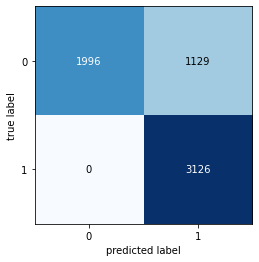

In [91]:
cm = confusion_matrix(y_test, y_pred_rf)

print("Matriz de confusão")

plot_confusion_matrix(conf_mat=cm)
plt.show()

In [92]:
y_prob_rf = number_rf.predict_proba(X_test_rd)
y_prob_rf = y_prob_rf[:, 1]

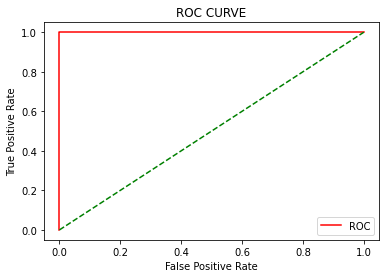

In [93]:
fper, tper, thresholds = roc_curve(y_test, y_prob_rf, pos_label=1)
plt.plot(fper, tper, color = 'red', label = 'ROC')
plt.plot([0,1], [0,1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend()
plt.show()

In [94]:
auc = roc_auc_score(y_test, y_prob_rf)

print('AUC: %.3f' % auc)

AUC: 1.000


In [95]:
np.round(fper)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [97]:
np.round(tper)

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [98]:
thresholds

array([1.87      , 0.87      , 0.8       , 0.79      , 0.78      ,
       0.77      , 0.76      , 0.75      , 0.74      , 0.73      ,
       0.72      , 0.71      , 0.7       , 0.69      , 0.68      ,
       0.67      , 0.66      , 0.65      , 0.64      , 0.63      ,
       0.62      , 0.61      , 0.6       , 0.59      , 0.58      ,
       0.57      , 0.56      , 0.55      , 0.542     , 0.54      ,
       0.53      , 0.525     , 0.52      , 0.51      , 0.5       ,
       0.49      , 0.485     , 0.48      , 0.47      , 0.46333333,
       0.46      , 0.45      , 0.44      , 0.43      , 0.42      ,
       0.41      , 0.4       , 0.395     , 0.38      , 0.37      ,
       0.36      , 0.35      , 0.34      , 0.335     , 0.33      ,
       0.32      , 0.31      , 0.3       , 0.29      , 0.28      ,
       0.27      , 0.26      , 0.25      , 0.24      , 0.23      ,
       0.22      , 0.21      , 0.2       , 0.19      , 0.17      ,
       0.16      , 0.15      , 0.14      , 0.13      , 0.12   


################################################################################
                         Modelo logit com cutoff = 0.1                          
################################################################################

Métricas de avaliação de teste


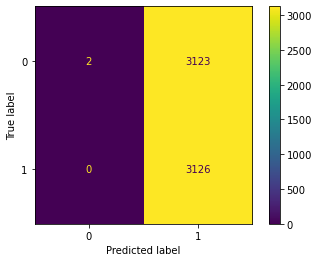

              precision    recall  f1-score   support

           0       1.00      0.00      0.00      3125
           1       0.50      1.00      0.67      3126

    accuracy                           0.50      6251
   macro avg       0.75      0.50      0.33      6251
weighted avg       0.75      0.50      0.33      6251


################################################################################
                 Modelo logit com cutoff = 0.15000000000000002                  
################################################################################

Métricas de avaliação de teste


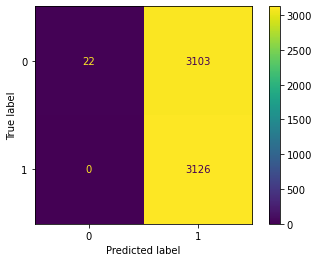

              precision    recall  f1-score   support

           0       1.00      0.01      0.01      3125
           1       0.50      1.00      0.67      3126

    accuracy                           0.50      6251
   macro avg       0.75      0.50      0.34      6251
weighted avg       0.75      0.50      0.34      6251


################################################################################
                 Modelo logit com cutoff = 0.20000000000000004                  
################################################################################

Métricas de avaliação de teste


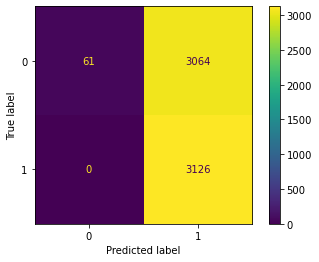

              precision    recall  f1-score   support

           0       1.00      0.02      0.04      3125
           1       0.51      1.00      0.67      3126

    accuracy                           0.51      6251
   macro avg       0.75      0.51      0.35      6251
weighted avg       0.75      0.51      0.35      6251


################################################################################
                 Modelo logit com cutoff = 0.25000000000000006                  
################################################################################

Métricas de avaliação de teste


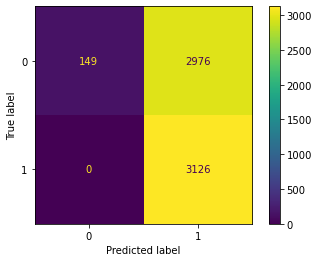

              precision    recall  f1-score   support

           0       1.00      0.05      0.09      3125
           1       0.51      1.00      0.68      3126

    accuracy                           0.52      6251
   macro avg       0.76      0.52      0.38      6251
weighted avg       0.76      0.52      0.38      6251


################################################################################
                 Modelo logit com cutoff = 0.30000000000000004                  
################################################################################

Métricas de avaliação de teste


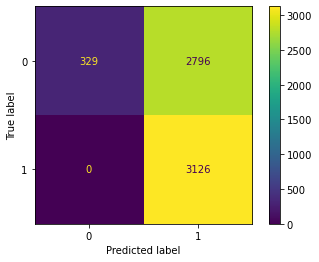

              precision    recall  f1-score   support

           0       1.00      0.11      0.19      3125
           1       0.53      1.00      0.69      3126

    accuracy                           0.55      6251
   macro avg       0.76      0.55      0.44      6251
weighted avg       0.76      0.55      0.44      6251


################################################################################
                  Modelo logit com cutoff = 0.3500000000000001                  
################################################################################

Métricas de avaliação de teste


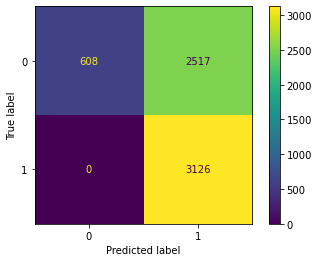

              precision    recall  f1-score   support

           0       1.00      0.19      0.33      3125
           1       0.55      1.00      0.71      3126

    accuracy                           0.60      6251
   macro avg       0.78      0.60      0.52      6251
weighted avg       0.78      0.60      0.52      6251


################################################################################
                 Modelo logit com cutoff = 0.40000000000000013                  
################################################################################

Métricas de avaliação de teste


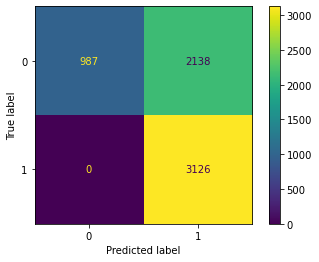

              precision    recall  f1-score   support

           0       1.00      0.32      0.48      3125
           1       0.59      1.00      0.75      3126

    accuracy                           0.66      6251
   macro avg       0.80      0.66      0.61      6251
weighted avg       0.80      0.66      0.61      6251


################################################################################
                 Modelo logit com cutoff = 0.45000000000000007                  
################################################################################

Métricas de avaliação de teste


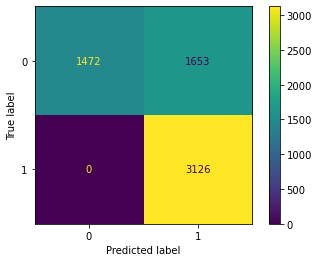

              precision    recall  f1-score   support

           0       1.00      0.47      0.64      3125
           1       0.65      1.00      0.79      3126

    accuracy                           0.74      6251
   macro avg       0.83      0.74      0.72      6251
weighted avg       0.83      0.74      0.72      6251


################################################################################
                  Modelo logit com cutoff = 0.5000000000000001                  
################################################################################

Métricas de avaliação de teste


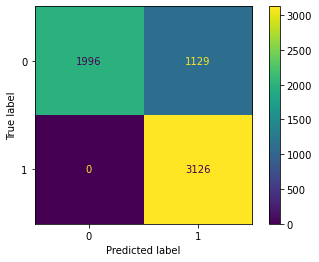

              precision    recall  f1-score   support

           0       1.00      0.64      0.78      3125
           1       0.73      1.00      0.85      3126

    accuracy                           0.82      6251
   macro avg       0.87      0.82      0.81      6251
weighted avg       0.87      0.82      0.81      6251


################################################################################
                  Modelo logit com cutoff = 0.5500000000000002                  
################################################################################

Métricas de avaliação de teste


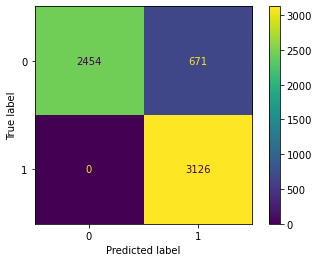

              precision    recall  f1-score   support

           0       1.00      0.79      0.88      3125
           1       0.82      1.00      0.90      3126

    accuracy                           0.89      6251
   macro avg       0.91      0.89      0.89      6251
weighted avg       0.91      0.89      0.89      6251


################################################################################
                  Modelo logit com cutoff = 0.6000000000000002                  
################################################################################

Métricas de avaliação de teste


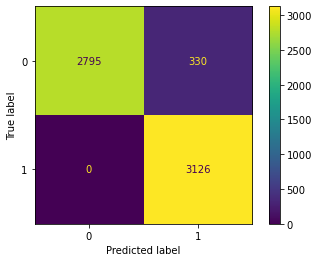

              precision    recall  f1-score   support

           0       1.00      0.89      0.94      3125
           1       0.90      1.00      0.95      3126

    accuracy                           0.95      6251
   macro avg       0.95      0.95      0.95      6251
weighted avg       0.95      0.95      0.95      6251


################################################################################
                  Modelo logit com cutoff = 0.6500000000000001                  
################################################################################

Métricas de avaliação de teste


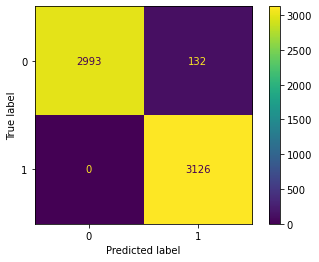

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      3125
           1       0.96      1.00      0.98      3126

    accuracy                           0.98      6251
   macro avg       0.98      0.98      0.98      6251
weighted avg       0.98      0.98      0.98      6251


################################################################################
                  Modelo logit com cutoff = 0.7000000000000002                  
################################################################################

Métricas de avaliação de teste


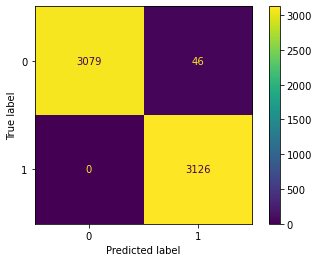

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3125
           1       0.99      1.00      0.99      3126

    accuracy                           0.99      6251
   macro avg       0.99      0.99      0.99      6251
weighted avg       0.99      0.99      0.99      6251


################################################################################
                  Modelo logit com cutoff = 0.7500000000000002                  
################################################################################

Métricas de avaliação de teste


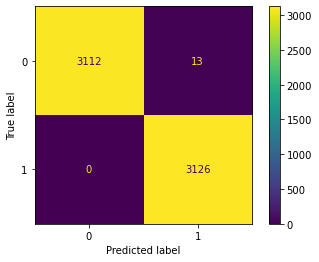

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3125
           1       1.00      1.00      1.00      3126

    accuracy                           1.00      6251
   macro avg       1.00      1.00      1.00      6251
weighted avg       1.00      1.00      1.00      6251


################################################################################
                  Modelo logit com cutoff = 0.8000000000000002                  
################################################################################

Métricas de avaliação de teste


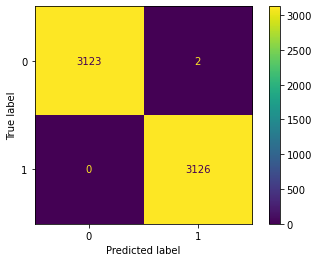

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3125
           1       1.00      1.00      1.00      3126

    accuracy                           1.00      6251
   macro avg       1.00      1.00      1.00      6251
weighted avg       1.00      1.00      1.00      6251


################################################################################
                  Modelo logit com cutoff = 0.8500000000000002                  
################################################################################

Métricas de avaliação de teste


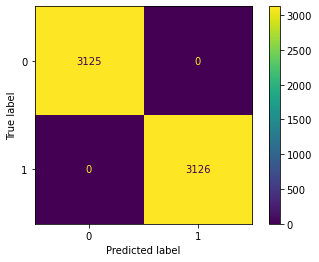

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3125
           1       1.00      1.00      1.00      3126

    accuracy                           1.00      6251
   macro avg       1.00      1.00      1.00      6251
weighted avg       1.00      1.00      1.00      6251


################################################################################
                  Modelo logit com cutoff = 0.9000000000000002                  
################################################################################

Métricas de avaliação de teste


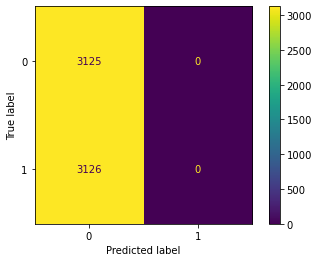

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\anaconda3\lib\site-packages\skle

              precision    recall  f1-score   support

           0       0.50      1.00      0.67      3125
           1       0.00      0.00      0.00      3126

    accuracy                           0.50      6251
   macro avg       0.25      0.50      0.33      6251
weighted avg       0.25      0.50      0.33      6251


################################################################################
                  Modelo logit com cutoff = 0.9500000000000003                  
################################################################################

Métricas de avaliação de teste


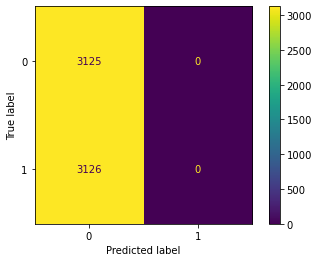

              precision    recall  f1-score   support

           0       0.50      1.00      0.67      3125
           1       0.00      0.00      0.00      3126

    accuracy                           0.50      6251
   macro avg       0.25      0.50      0.33      6251
weighted avg       0.25      0.50      0.33      6251



C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\anaconda3\lib\site-packages\skle

In [87]:
# começamos com dois dfs vazios, e vamos preenchendo abaixo
# (com os concats)
df_results_train = pd.DataFrame()
df_results_test = pd.DataFrame()

cutoff_list = np.arange(0.1, 1, 0.05)

for cutoff in cutoff_list:
    
    print()
    print("#"*80)
    print(f"Modelo logit com cutoff = {cutoff}".center(80))
    print("#"*80)
    print()
    
    # ============================================
    
    cr_train = clf_metrics(number_rf, X_train_rd, y_train, label_metrica="treino", cutoff=cutoff, print_plot=False)
    df_cr_train = pd.DataFrame(cr_train)

    # o .iloc[:-1, :] é pra excluir o "support" (pode trazer tb caso queira)
    df_melt = df_cr_train.iloc[:-1, :].reset_index(drop=False).melt(id_vars='index', var_name="type")
    df_melt['cutoff'] = cutoff

    # corrigindo os dados de acurácia
    accuracy = df_melt.query("type == 'accuracy'").copy()
    accuracy["index"] = "accuracy"

    df_melt = df_melt.drop(index=accuracy.index)
    df_melt = pd.concat([df_melt, accuracy.iloc[[0], :]]).reset_index(drop=False)

    # pivotando
    df_pivot = df_melt.pivot(columns=['type', 'index'], values='value', index='cutoff')
    
    df_results_train = pd.concat([df_results_train, df_pivot])
            
    # ============================================
    
    cr_test = clf_metrics(number_rf, X_test_rd, y_test, label_metrica="teste", cutoff=cutoff)
    df_cr_test = pd.DataFrame(cr_test)
    
    # o .iloc[:-1, :] é pra excluir o "support" (pode trazer tb caso queira)
    df_melt = df_cr_test.iloc[:-1, :].reset_index(drop=False).melt(id_vars='index', var_name="type")
    df_melt['cutoff'] = cutoff

    # corrigindo os dados de acurácia
    accuracy = df_melt.query("type == 'accuracy'").copy()
    accuracy["index"] = "accuracy"

    df_melt = df_melt.drop(index=accuracy.index)
    df_melt = pd.concat([df_melt, accuracy.iloc[[0], :]]).reset_index(drop=False)

    # pivotando
    df_pivot = df_melt.pivot(columns=['type', 'index'], values='value', index='cutoff')
    
    df_results_test = pd.concat([df_results_test, df_pivot])
    
    # ============================================

In [107]:
df_results_test.sort_values(('1', 'f1-score'), ascending=False)

type           0                            1                  macro avg  \
index  precision   recall  f1-score precision recall  f1-score precision   
cutoff                                                                     
0.85     1.00000  1.00000  1.000000  1.000000    1.0  1.000000  1.000000   
0.80     1.00000  0.99936  0.999680  0.999361    1.0  0.999680  0.999680   
0.75     1.00000  0.99584  0.997916  0.995859    1.0  0.997925  0.997929   
0.70     1.00000  0.98528  0.992585  0.985498    1.0  0.992696  0.992749   
0.65     1.00000  0.95776  0.978424  0.959484    1.0  0.979323  0.979742   
0.60     1.00000  0.89440  0.944257  0.904514    1.0  0.949863  0.952257   
0.55     1.00000  0.78528  0.879728  0.823282    1.0  0.903077  0.911641   
0.50     1.00000  0.63872  0.779535  0.734665    1.0  0.847040  0.867333   
0.45     1.00000  0.47104  0.640418  0.654112    1.0  0.790892  0.827056   
0.40     1.00000  0.31584  0.480058  0.593845    1.0  0.745173  0.796922   
0.35     1.00000  0.19456  0.325743  0.553961    1.0  0.712966  0.776980   
0.30     1.00000  0.10528  0.190504  0.527862    1.0  0.690981  0.763931   
0.25     1.00000  0.04768  0.091020  0.512291    1.0  0.677503  0.756146   
0.20     1.00000  0.01952  0.038293  0.505008    1.0  0.671103  0.752504   
0.15     1.00000  0.00704  0.013982  0.501846    1.0  0.668306  0.750923   
0.10     1.00000  0.00064  0.001279  0.500240    1.0  0.666880  0.750120   
0.90     0.49992  1.00000  0.666596  0.000000    0.0  0.000000  0.249960   
0.95     0.49992  1.00000  0.666596  0.000000    0.0  0.000000  0.249960   

type                      weighted avg                      accuracy  
index    recall  f1-score    precision    recall  f1-score  accuracy  
cutoff                                                                
0.85    1.00000  1.000000     1.000000  1.000000  1.000000  1.000000  
0.80    0.99968  0.999680     0.999680  0.999680  0.999680  0.999680  
0.75    0.99792  0.997920     0.997929  0.997920  0.997920  0.997920  
0.70    0.99264  0.992641     0.992748  0.992641  0.992641  0.992641  
0.65    0.97888  0.978874     0.979739  0.978883  0.978874  0.978883  
0.60    0.94720  0.947060     0.952249  0.947208  0.947060  0.947208  
0.55    0.89264  0.891402     0.911627  0.892657  0.891404  0.892657  
0.50    0.81936  0.813287     0.867311  0.819389  0.813293  0.819389  
0.45    0.73552  0.715655     0.827028  0.735562  0.715667  0.735562  
0.40    0.65792  0.612616     0.796890  0.657975  0.612637  0.657975  
0.35    0.59728  0.519355     0.776945  0.597344  0.519386  0.597344  
0.30    0.55264  0.440743     0.763893  0.552712  0.440783  0.552712  
0.25    0.52384  0.384262     0.756107  0.523916  0.384309  0.523916  
0.20    0.50976  0.354698     0.752464  0.509838  0.354749  0.509838  
0.15    0.50352  0.341144     0.750883  0.503599  0.341196  0.503599  
0.10    0.50032  0.334080     0.750080  0.500400  0.334133  0.500400  
0.90    0.50000  0.333298     0.249920  0.499920  0.333244  0.499920  
0.95    0.50000  0.333298     0.249920  0.499920  0.333244  0.499920

### Avaliação dos Dados de treino

In [41]:
y_pred_rf = number_rf.predict(X_train_rd)

In [42]:
print(classification_report(y_train, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9372
           1       1.00      1.00      1.00      9371

    accuracy                           1.00     18743
   macro avg       1.00      1.00      1.00     18743
weighted avg       1.00      1.00      1.00     18743



Matriz de confusão


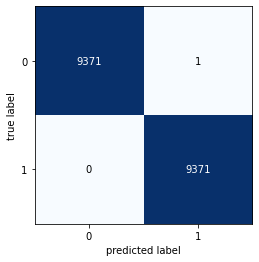

In [43]:
cm = confusion_matrix(y_train, y_pred_rf)

print("Matriz de confusão")

plot_confusion_matrix(conf_mat=cm)
plt.show()

In [63]:
y_prob_rf = number_rf.predict_proba(X_train_rd)[:, 1]


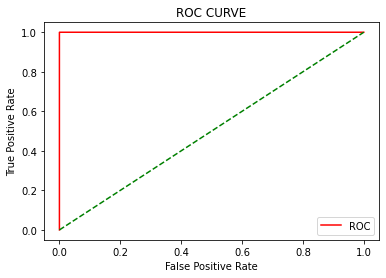

In [64]:
fper, tper, thresholds = roc_curve(y_train, y_prob_rf, pos_label=1)
plt.plot(fper, tper, color = 'red', label = 'ROC')
plt.plot([0,1], [0,1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend()
plt.show()

In [70]:
np.round(fper)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [71]:
np.round(tper)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [69]:
thresholds

array([2.        , 1.        , 0.99      , 0.98      , 0.97      ,
       0.96      , 0.95      , 0.94      , 0.93      , 0.92      ,
       0.91      , 0.9       , 0.89      , 0.88      , 0.87      ,
       0.8675    , 0.86      , 0.85333333, 0.85      , 0.84      ,
       0.835     , 0.83      , 0.82      , 0.81333333, 0.81      ,
       0.8       , 0.795     , 0.79      , 0.785     , 0.78      ,
       0.775     , 0.77      , 0.7675    , 0.76      , 0.75      ,
       0.74      , 0.73416667, 0.73      , 0.72      , 0.71      ,
       0.7       , 0.69      , 0.68      , 0.67      , 0.66      ,
       0.65      , 0.6       , 0.55583333, 0.38      , 0.36      ,
       0.35      , 0.34      , 0.33      , 0.32      , 0.31      ,
       0.3       , 0.29      , 0.28      , 0.27      , 0.26      ,
       0.25      , 0.24      , 0.23      , 0.22      , 0.21      ,
       0.20333333, 0.2       , 0.19533333, 0.19333333, 0.19166667,
       0.19      , 0.18      , 0.1725    , 0.17      , 0.16   

In [ ]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(X_train_rd, y_train)
y_pred_log = log.predict(X_test_rd)

In [ ]:
print(classification_report(y_test, y_pred_log))

In [ ]:
cm_log = confusion_matrix(y_test, y_pred_log)

print("Matriz de confusão")

plot_confusion_matrix(conf_mat=cm_log)
plt.show()

In [ ]:
y_prob_log = log.predict_proba(X_test_rd)
y_prob_log = y_prob_log[:, 1]

In [ ]:
y_prob_log

In [ ]:
fp, tp, thresholds = roc_curve(y_test, y_prob_log)
plt.plot(fp, tp, color = 'red', label = 'ROC')
plt.plot([0,1], [0,1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend()
plt.show()

In [ ]:
fp

In [ ]:
thresholds

In [ ]:
auc_log = roc_auc_score(y_test, y_prob_log)

print('AUC: %.3f' % auc_log)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=30)
tree.fit(X_train_rd, y_train)
y_pred_tree = tree.predict(X_test_rd)

In [ ]:
print(classification_report(y_test, y_pred_tree))

In [ ]:
cm_tree = confusion_matrix(y_test, y_pred_tree)

print("Matriz de confusão")

plot_confusion_matrix(conf_mat=cm_tree)
plt.show()